In [1]:
import cv2
import numpy as np
import pytesseract as ocr
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("img/bitmap.pbm",0)
img = img/255
img = 1-img

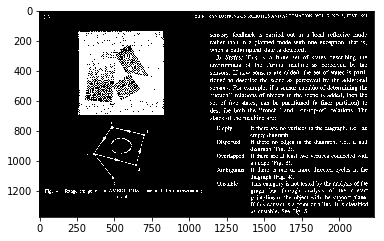

In [3]:
fig = plt.figure()
plt.imshow(img,cmap="gray")
plt.show()

In [4]:
kernel1 = np.ones((1, 40), np.uint8)
kernel2 = np.ones((60, 1), np.uint8)

In [5]:
dilate1 = cv2.dilate(img, kernel1)
erode1 = cv2.erode(dilate1, kernel1)

In [6]:
dilate2 = cv2.dilate(img, kernel2)
erode2 = cv2.erode(dilate2, kernel2)

In [7]:
intersection = cv2.bitwise_and(erode1, erode2)

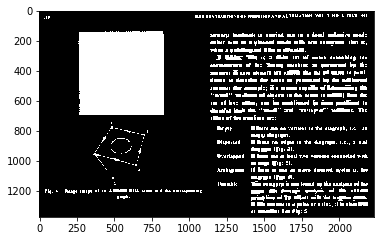

In [8]:
fig = plt.figure()
plt.imshow(intersection,cmap="gray")
plt.show()

In [9]:
kernel3 = np.ones((10, 1), np.uint8)
result = cv2.dilate(intersection, kernel3)

In [10]:
kernel4 = np.ones((1,8),np.uint8)
closing = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel4)

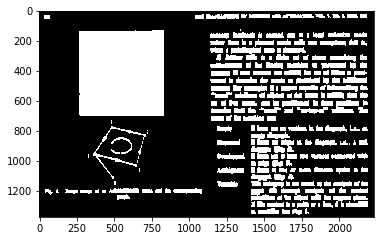

In [11]:
fig = plt.figure()
plt.imshow(closing,cmap="gray")
plt.show()

In [12]:
closing = closing.astype(np.uint8)

ret, labels = cv2.connectedComponents(closing,connectivity=4)

In [13]:
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

print(ret)

245


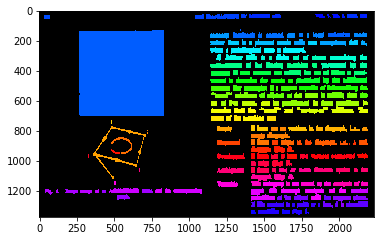

In [14]:
fig = plt.figure()
plt.imshow(labeled_img)
plt.show()

In [15]:
for label in range(1,ret):
    mask = np.array(labels, dtype=np.uint8)
    mask[labels == label] = 255

In [16]:
cnts, hierarchy= cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
boxes = [cv2.boundingRect(contour) for contour in cnts]

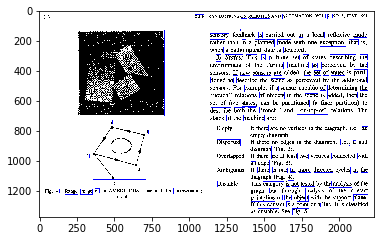

In [17]:
img3 = np.zeros((img.shape[0],img.shape[1],3),np.uint8)
img3[:,:,0] = img
img3[:,:,1] = img
img3[:,:,2] = img

comps = (1-img3)*255
for i in boxes:
    cv2.rectangle(comps,(i[0],i[1]),(i[0]+i[2],i[1]+i[3]),(0,0,255))
fig = plt.figure()
plt.imshow(comps,cmap="gray")
plt.show()

In [18]:
area = np.zeros((len(boxes)))
print(area.shape)
for i in range(len(boxes)):
    y,x,h,w = boxes[i]
    p = 0
    b = 0
    for j in range(x,x+w):
        for k in range(y,y+h):
            if(1-img[j][k]) == 0:
                p += 1
    area[i] = p/(h*w)


(240,)


In [19]:
print(area.mean())
print(np.median(area))
print(np.var(area))
print((np.std(area)))
print(max(area))

0.28230426723332
0.2815592667566352
0.003948103705997503
0.06283393753376836
0.8238866396761133


In [20]:
#cv2.imwrite("dilate1.pbm",1-dilate1)
#cv2.imwrite("erode1.pbm",1-erode1)
#cv2.imwrite("dilate2.pbm",1-dilate2)
#cv2.imwrite("erode2.pbm",1-erode2)
#cv2.imwrite("intersection.pbm",1-intersection)
#cv2.imwrite("result.pbm",1-result)
#cv2.imwrite("closing.pbm",1-closing)
#cv2.imwrite("comps.png",comps)
#cv2.imwrite("labeled.png",labeled_img)''

In [37]:
for i in range(len(boxes)):
    y,x,h,w = boxes[i]
    h += y
    w += x
    tmp = img[x:w][y:h]
    print(tmp.shape)
    #cv2.imwrite("results/tmp/%d.png" % i,(1-tmp)*255)
    #try:
    #    phrase = ocr.image_to_string(tmp, lang='eng')
    #    print(phrase)
    #except:
    #    pass

(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
(0, 2233)
